In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import nltk 
from nltk import word_tokenize

from nltk.corpus import stopwords
import re
import string
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn import svm
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS


from sklearn.linear_model import LogisticRegression
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

CalledProcessError: Command '['ls', '../input']' returned non-zero exit status 1.

In [3]:
df = pd.read_csv('../input/all.csv') #load dataset

FileNotFoundError: [Errno 2] No such file or directory: '../input/all.csv'

In [3]:
df.head() #getting top 5 head

,author,content,poem name,age,type
0,WILLIAM SHAKESPEARE,Let the bird of loudest lay\r\nOn the sole Ara...,The Phoenix and the Turtle,Renaissance,Mythology & Folklore
1,DUCHESS OF NEWCASTLE MARGARET CAVENDISH,"Sir Charles into my chamber coming in,\r\nWhen...",An Epilogue to the Above,Renaissance,Mythology & Folklore
2,THOMAS BASTARD,"Our vice runs beyond all that old men saw,\r\n...","Book 7, Epigram 42",Renaissance,Mythology & Folklore
3,EDMUND SPENSER,"Lo I the man, whose Muse whilome did maske,\r\...","from The Faerie Queene: Book I, Canto I",Renaissance,Mythology & Folklore
4,RICHARD BARNFIELD,"Long have I longd to see my love againe,\r\nSt...",Sonnet 16,Renaissance,Mythology & Folklore


In [4]:
df.shape #getting shape

(573, 5)

In [5]:
df.info() #info of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573 entries, 0 to 572
Data columns (total 5 columns):
author       573 non-null object
content      573 non-null object
poem name    571 non-null object
age          573 non-null object
type         573 non-null object
dtypes: object(5)
memory usage: 22.5+ KB


2 values are missing in poem name

In [6]:
df.isnull().sum() #checking again null vaules

author       0
content      0
poem name    2
age          0
type         0
dtype: int64

In [7]:
df.groupby('type').count()

,author,content,poem name,age
type,,,,
Love,326,326,326,326
Mythology & Folklore,59,59,58,59
Nature,188,188,187,188


In [8]:
#looking in content
df['content']

0      Let the bird of loudest lay\r\nOn the sole Ara...
1      Sir Charles into my chamber coming in,\r\nWhen...
2      Our vice runs beyond all that old men saw,\r\n...
3      Lo I the man, whose Muse whilome did maske,\r\...
4      Long have I longd to see my love againe,\r\nSt...
5      Cherry-lipt Adonis in his snowie shape,\r\n   ...
6      Praisd be Dianas fair and harmless light;\r\nP...
7      When I was fair and young, then favor graced m...
8      When by thy scorn, O murd'ress, I am dead\r\n ...
9      Pla ce bo,\r\nWho is there, who?\r\nDi le xi,\...
10     Ye learned sisters which have oftentimes\r\nBe...
11     On Hellespont, guilty of true love's blood,\r\...
12     By that he ended had his ghostly sermon,\r\nTh...
13     CALM was the day, and through the trembling ai...
14     THENOT    &      HOBBINOLL\r\nTell me good Hob...
15     PIERCE       &         CUDDIE\r\nCuddie, for s...
16     Go and catch a falling star,\r\n    Get with c...
17     Orpheus with his lute ma

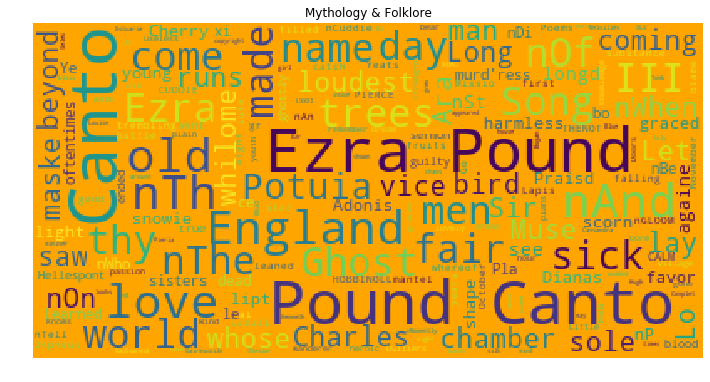

In [9]:




stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='orange',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=15
                         ).generate(str(df[df['type']=='Mythology & Folklore']['content']))

fig = plt.figure(1,figsize=(12,18))
plt.imshow(wordcloud)
plt.title('Mythology & Folklore')
plt.axis('off')
plt.show()

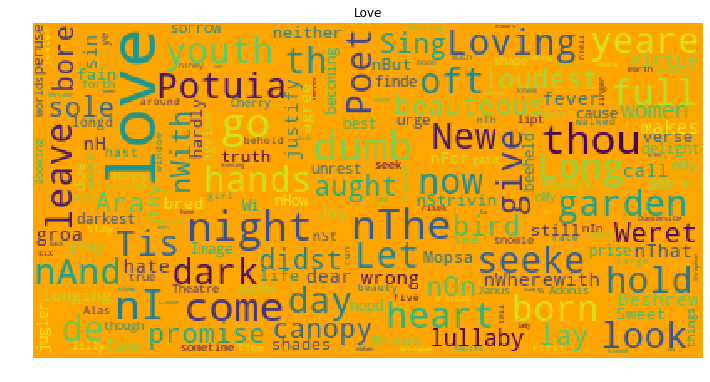

In [10]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='orange',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=15
                         ).generate(str(df[df['type']=='Love']['content']))

fig = plt.figure(1,figsize=(12,18))
plt.title('Love')
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

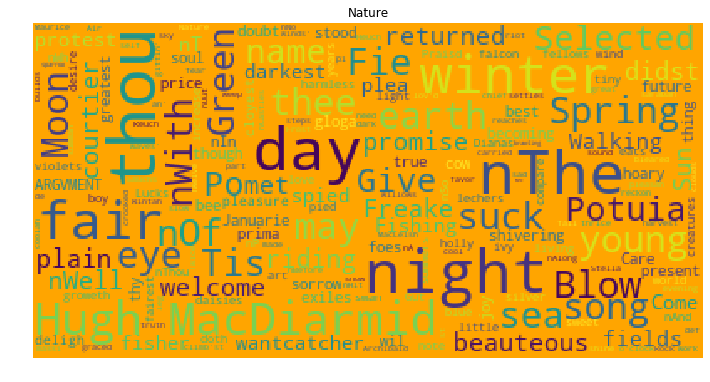

In [11]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='orange',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=15
                         ).generate(str(df[df['type']=='Nature']['content']))

fig = plt.figure(1,figsize=(12,18))
plt.title('Nature')
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

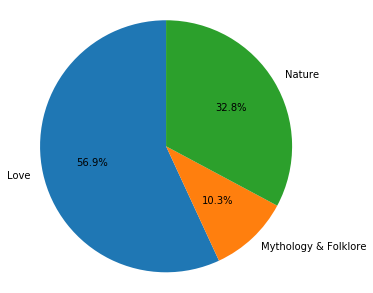

In [12]:
labels = 'Love', 'Mythology & Folklore', 'Nature'
sizes = [326, 59, 188]


fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

1. In our dataset we have html tag. we have to remove it first

In [13]:
#function to remove ounctuation
def removePunctuation(x):
    x = x.lower()
    x = re.sub(r'[^\x00-\x7f]',r' ',x)
    x = x.replace('\r','')
    x = x.replace('\n','')
    x = x.replace('  ','')
    x = x.replace('\'','')
    return re.sub("["+string.punctuation+"]", " ", x)


#getting stop words
from nltk.corpus import stopwords

stops = set(stopwords.words("english")) 


#function to remove stopwords
def removeStopwords(x):
    filtered_words = [word for word in x.split() if word not in stops]
    return " ".join(filtered_words)


def processText(x):
    x= removePunctuation(x)
    x= removeStopwords(x)
    return x


from nltk.tokenize import sent_tokenize, word_tokenize
X= pd.Series([word_tokenize(processText(x)) for x in df['content']])
X.head()

0    [let, bird, loudest, layon, sole, arabian, tre...
1    [sir, charles, chamber, coming, writing, fairy...
2    [vice, runs, beyond, old, men, saw, far, authe...
3    [lo, man, whose, muse, whilome, maske, time, t...
4    [long, longd, see, love, againe, still, wisht,...
dtype: object

In [2]:
#vectorizing X and y to process
vectorize=CountVectorizer(max_df=0.95, min_df=0.005)
X=vectorize.fit_transform(df['content'], df['author'])
vect = CountVectorizer(tokenizer = lambda x: x.split(), binary = 'true')
y = df['author']


NameError: name 'df' is not defined

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)




**Micro-averaging & Macro-averaging** 
To measure a multi-class classifier we have to average out the classes somehow. There are two different methods of doing this called micro-averaging and macro-averaging.   

  
In **micro-averaging** all TPs, TNs, FPs and FNs for each class are summed up and then the average is taken.      
**Macro-averaging** is straight forward. We just take the average of the precision and recall of the system on different sets.   

 **Hamming-Loss** is the fraction of labels that are incorrectly predicted

In [16]:
#sgd classifier

classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.00001, penalty='l1'), n_jobs=-1)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

print("accuracy :",classifier.score(X_train, y_train))
print("macro f1 score :",metrics.f1_score(y_test, predictions, average = 'macro'))
print("micro f1 scoore :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))
print("Precision recall report :\n",metrics.classification_report(y_test, predictions))

accuracy : 0.597911227154047
macro f1 score : 0.34516104214750587
micro f1 scoore : 0.5027522935779817
hamming loss : 0.28526315789473683
Precision recall report :
               precision    recall  f1-score   support

           0       0.05      0.05      0.05        22
           1       0.19      0.41      0.26        22
           2       0.78      0.73      0.76       119
           3       0.11      0.23      0.14        22
           4       0.40      0.71      0.51        49

   micro avg       0.44      0.59      0.50       234
   macro avg       0.31      0.43      0.35       234
weighted avg       0.52      0.59      0.54       234
 samples avg       0.50      0.67      0.55       234



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


In [17]:
#logistic regression

classifier = OneVsRestClassifier(LogisticRegression(penalty='l1'), n_jobs=-1)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

print("accuracy :",classifier.score(X_train, y_train))
print("macro f1 score :",metrics.f1_score(y_test, predictions, average = 'macro'))
print("micro f1 scoore :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))
print("Precision recall report :\n",metrics.classification_report(y_test, predictions))

accuracy : 0.8433420365535248
macro f1 score : 0.32976190476190476
micro f1 scoore : 0.5483870967741935
hamming loss : 0.2063157894736842
Precision recall report :
               precision    recall  f1-score   support

           0       0.25      0.09      0.13        22
           1       0.25      0.09      0.13        22
           2       0.78      0.69      0.73       119
           3       0.25      0.09      0.13        22
           4       0.44      0.63      0.52        49

   micro avg       0.59      0.51      0.55       234
   macro avg       0.39      0.32      0.33       234
weighted avg       0.56      0.51      0.52       234
 samples avg       0.59      0.61      0.59       234



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


In [1]:
#linear svc classifier
from sklearn.svm import LinearSVC

classifier = OneVsRestClassifier(LinearSVC(random_state=0, tol=1e-5), n_jobs=-1)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

print("accuracy :",classifier.score(X_train, y_train))
print("macro f1 score :",metrics.f1_score(y_test, predictions, average = 'macro'))
print("micro f1 scoore :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))
print("Precision recall report :\n",metrics.classification_report(y_test, predictions))

NameError: name 'OneVsRestClassifier' is not defined